Gaussian Mixture Models (GMM)

Mostly used for clustering and it's an unsupervised learning algorithm

the function is almost as the same as KNN, however. both has a different shape of classification

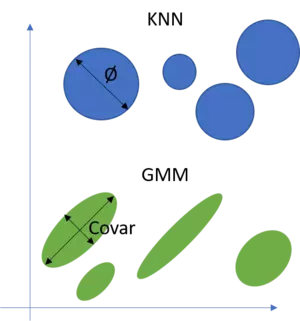

KNN and GMM models is defined by their mean vector. Hence the mean vector gives the space whilst the diameter respectively the covariance matrix defines the shape of KNN and GMM models.

As an example given a dataset below, we wanna classift the dataset into 2 classification

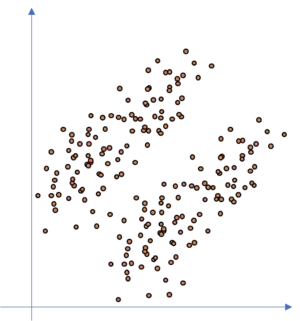

This is how KNN gonna peform:

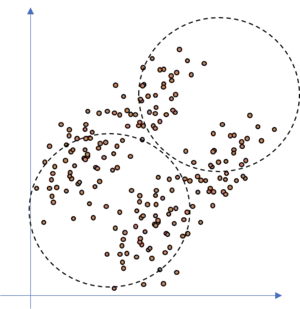

GMM:

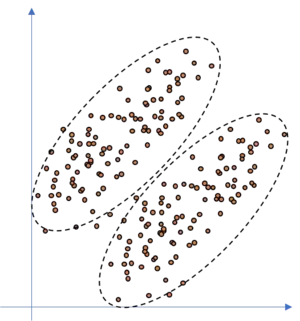

Math behind: https://python-course.eu/machine-learning/expectation-maximization-and-gaussian-mixture-models-gmm.php

In [2]:
#modules
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from matplotlib import style
import random as rd
import numpy as np
from scipy.stats import multivariate_normal
style.use("fivethirtyeight")

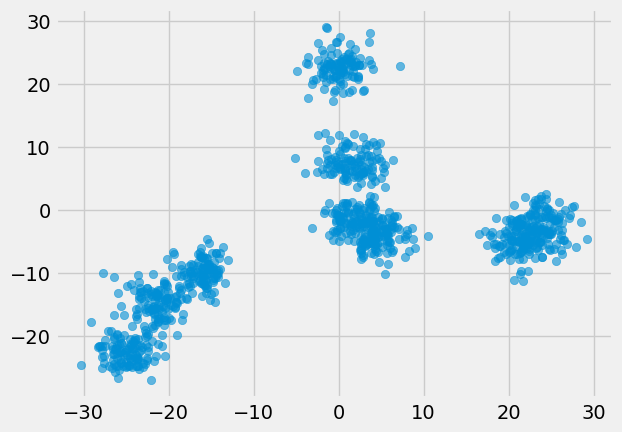

In [5]:
#making dataset
    #for the center
howmanycenters=rd.randint(3, 14)
lim =25
centers=[]
for i in range(howmanycenters):
    centers.append([np.random.uniform(-lim, lim, 1)[0], np.random.uniform(-lim, lim, 1)[0]])
    #dataset
X, y=make_blobs(1000, random_state=3122, centers=centers, cluster_std=2)                #we won't use the X anyway LOL!

#Trying to visualize the shitty data
fig, ax =plt.subplots()
ax.scatter(X[:,0], X[:,1], alpha=0.6)
plt.show()

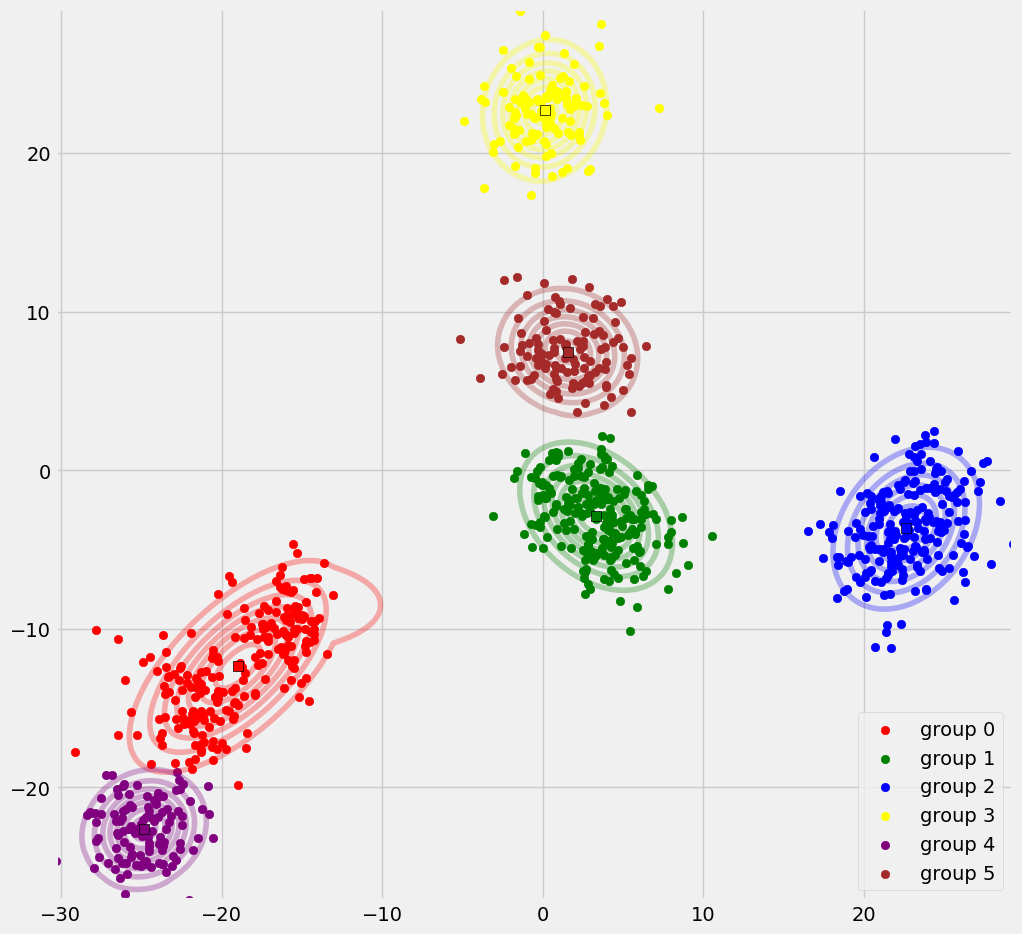

In [31]:
#using the gaussmodel to predict and make an area out of it
GaussModel=GaussianMixture(random_state=321, n_components=6)
GaussModel.fit(X)
predicted=GaussModel.predict(X)
means=GaussModel.means_
Covs=GaussModel.covariances_

#plot scatter each classifier
colours=["r", "g", "b", "yellow", "purple", "brown"]
fig, ax=plt.subplots(figsize=(11,11))
for i in np.unique(predicted):
    ax.scatter(X[predicted==i,0 ], X[predicted==i, 1], c=colours[i], alpha=1, label="group "+str(i))          #scatter dataset
    ax.scatter(means[i,0 ], means[i, 1], c=colours[i], alpha=1, marker="s", edgecolors="black", s=60)
ax.legend(loc="lower right")

#range of each data classification (countour)
x,y = np.meshgrid(np.sort(X[:,0]),np.sort(X[:,1]))
XY = np.array([x.flatten(),y.flatten()]).T

for i in np.unique(predicted):
    multi_normal = multivariate_normal(mean=means[i],cov=Covs[i])
    z=multi_normal.pdf(XY).reshape(x.shape)
    ax.contour(np.sort(X[:,0]),np.sort(X[:,1]), z, colors=colours[i],alpha=0.3)
plt.show()

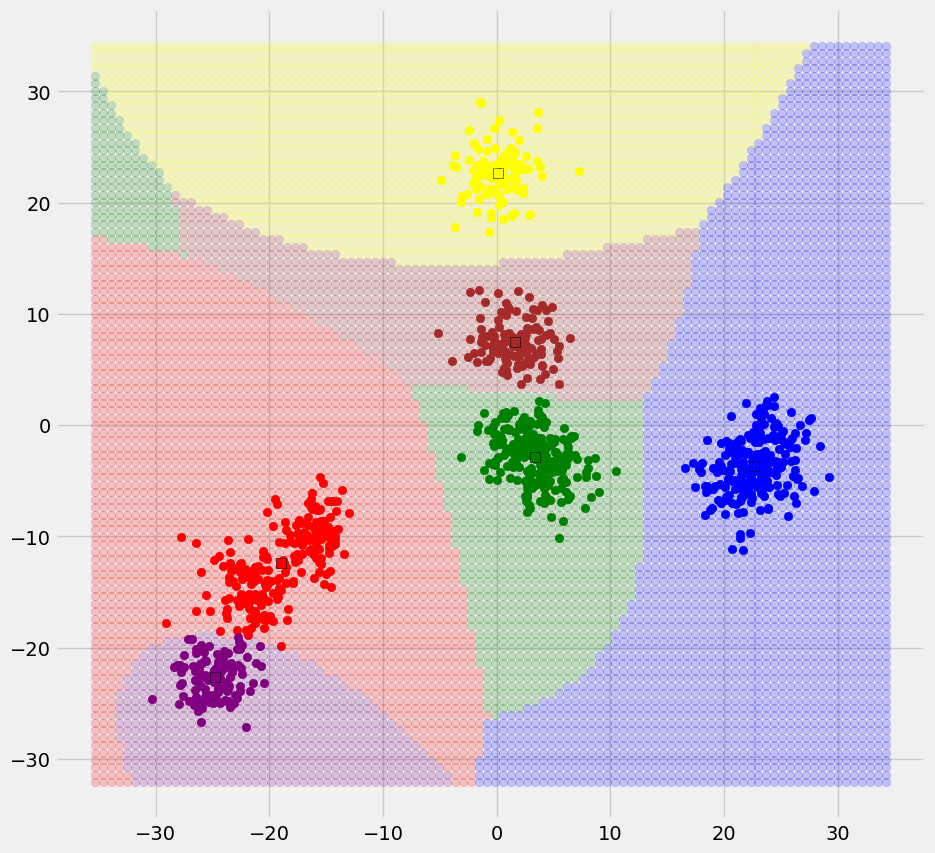

In [32]:
#the area of each classification
fig,ax=plt.subplots(figsize=(10,10))
x_min, y_min=X[:,0].min()-5, X[:,1].min()-5
x_max, y_max=X[:,0].max()+5, X[:,1].max()+5
XX, YY=np.linspace(x_min, x_max, 100).reshape(-1,1), np.linspace(y_min, y_max, 100).reshape(-1,1)
XX, YY=np.meshgrid(XX, YY)
XY=np.array([XX.flatten(),YY.flatten()]).T
testshit=GaussModel.predict(XY)

for i in np.unique(predicted):
    ax.scatter(X[predicted==i,0], X[predicted==i, 1], c=colours[i], alpha=1)
    ax.scatter(means[i,0 ], means[i, 1], c=colours[i], alpha=1, marker="s", edgecolors="black", s=60)
    ax.scatter(XY[testshit==i,0], XY[testshit==i,1], c=colours[i], alpha=0.2)
plt.show()

[[30 10]
 [20 20]]


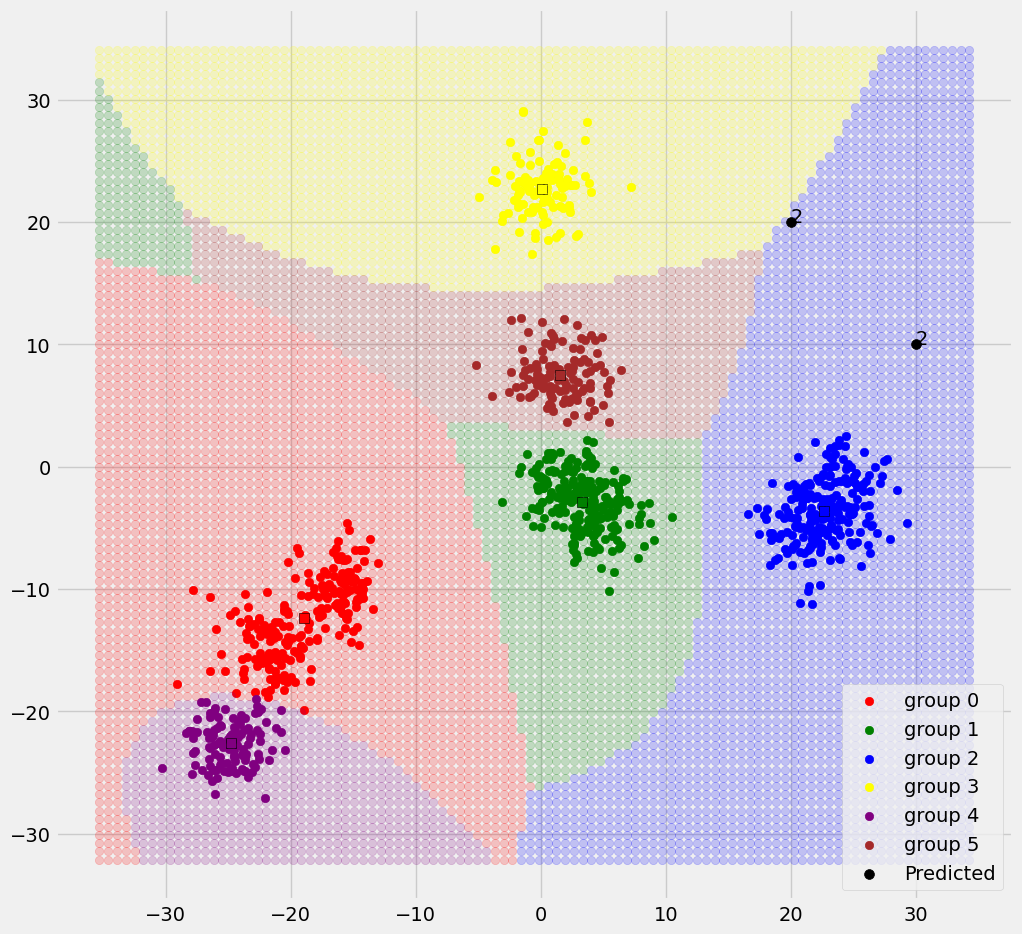

In [56]:
fig, ax=plt.subplots(figsize=(11,11))
for i in np.unique(predicted):
    ax.scatter(X[predicted==i,0], X[predicted==i, 1], c=colours[i], alpha=1, label="group "+str(i))
    ax.scatter(means[i,0 ], means[i, 1], c=colours[i], alpha=1, marker="s", edgecolors="black", s=60)
    ax.scatter(XY[testshit==i,0], XY[testshit==i,1], c=colours[i], alpha=0.2)
    
def predictdata(urdataheremate):
    urdataheremate=np.array(urdataheremate)
    print(urdataheremate)
    temp=GaussModel.predict(urdataheremate)
    ax.scatter(urdataheremate[:,0], urdataheremate[:, 1], c="black", alpha=1, label="Predicted", s=50)
    for i in range(len(urdataheremate)):
        ax.annotate(temp[i], [urdataheremate[i][0],urdataheremate[i][1]])

predictdata([[30,10], [20,20]])
ax.legend(loc="lower right")
plt.show()

Converged: True
[[1.94756664e-93 1.00000000e+00 4.00098007e-33 9.36305075e-82
  5.02664415e-44]]


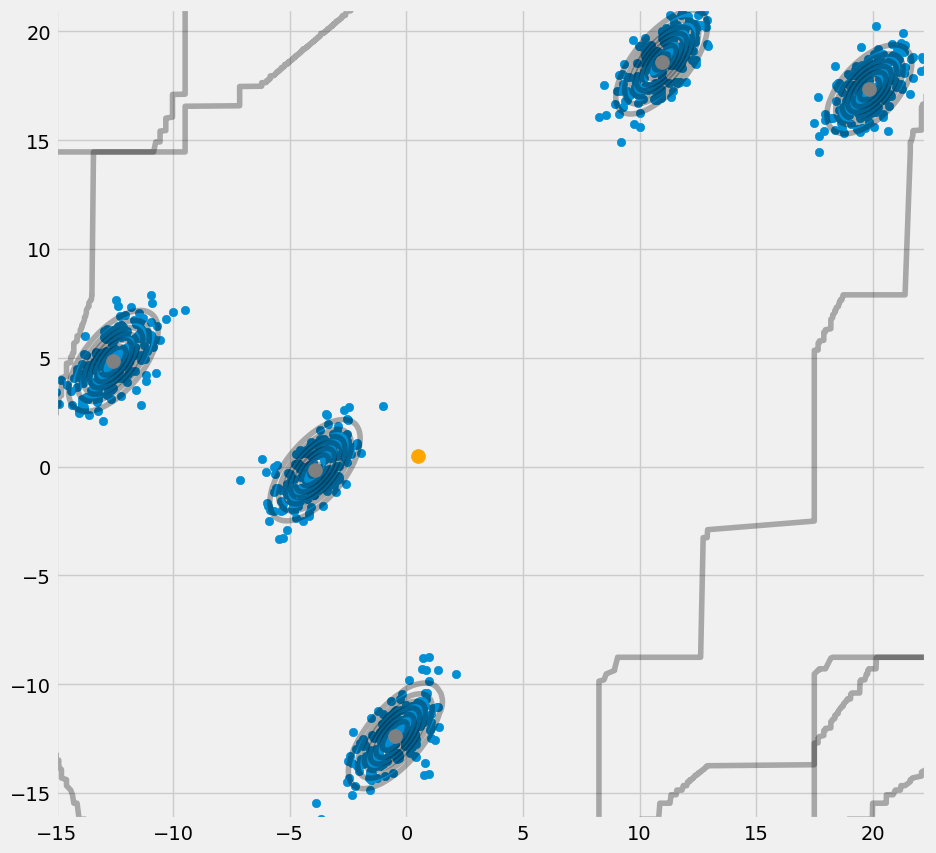

[[-15.02321052 -16.19995095]
 [-14.91001999 -16.19995095]
 [-14.79340661 -16.19995095]
 ...
 [ 22.12762016  21.02458835]
 [ 22.14260149  21.02458835]
 [ 22.28818184  21.02458835]]


In [127]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
from sklearn.datasets import make_blobs
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture

# 0. Create dataset
X,Y = make_blobs(cluster_std=0.5,random_state=20,n_samples=1000,centers=5)

# Stratch dataset to get ellipsoid data
X = np.dot(X,np.random.RandomState(0).randn(2,2))

x,y = np.meshgrid(np.sort(X[:,0]),np.sort(X[:,1]))
XY = np.array([x.flatten(),y.flatten()]).T

GMM = GaussianMixture(n_components=5).fit(X) # Instantiate and fit the model
print('Converged:',GMM.converged_) # Check if the model has converged
means = GMM.means_ 
covariances = GMM.covariances_


# Predict
Y = np.array([[0.5],[0.5]])
prediction = GMM.predict_proba(Y.T)
print(prediction)

# Plot   
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
ax0.scatter(X[:,0],X[:,1])
ax0.scatter(Y[0,:],Y[1,:],c='orange',zorder=10,s=100)
for m,c in zip(means,covariances):
    multi_normal = multivariate_normal(mean=m,cov=c)
    ax0.contour(np.sort(X[:,0]),np.sort(X[:,1]),multi_normal.pdf(XY).reshape(len(X),len(X)),colors='black',alpha=0.3)
    ax0.scatter(m[0],m[1],c='grey',zorder=10,s=100)
    
plt.show()
print(XY)